Kaggle Competition - Predict a purchased policy based on transaction history

As a customer shops an insurance policy, he/she will receive a number of quotes with different coverage options before purchasing a plan. This is represented in this challenge as a series of rows that include a customer ID, information about the customer, information about the quoted policy, and the cost. Your task is to predict the purchased coverage options using a limited subset of the total interaction history. If the eventual purchase can be predicted sooner in the shopping window, the quoting process is shortened and the issuer is less likely to lose the customer's business.

Using a customer’s shopping history, can you predict what policy they will end up choosing?

Importing Libraries

In [1]:
import pandas as pd


import matplotlib.pyplot as plt

%pylab inline

import numpy as np

import sklearn

import sqlite3

Populating the interactive namespace from numpy and matplotlib


Loading Data files

In [2]:
train_data_csv = "/home/azafar/Projects/Allstate-Purchase-Prediction-Challenge/Data/train.csv"

test_data_csv = "/home/azafar/Projects/Allstate-Purchase-Prediction-Challenge/Data/test_v2.csv"

print "done - csv file path store"

done - csv file path store


In [3]:
def read_csv(file):
    return pd.read_csv(file)

print "done - csv read function"

done - csv read function


In [62]:
train_data = read_csv(train_data_csv)

test_data = read_csv(test_data_csv)

print "done - read csv train and test data"

done - read csv train and test data


Train Data Head

In [5]:
print train_data.head()

   customer_ID  shopping_pt  record_type  day   time state  location  \
0     10000000            1            0    0  08:35    IN     10001   
1     10000000            2            0    0  08:38    IN     10001   
2     10000000            3            0    0  08:38    IN     10001   
3     10000000            4            0    0  08:39    IN     10001   
4     10000000            5            0    0  11:55    IN     10001   

   group_size  homeowner  car_age  ...  C_previous  duration_previous  A  B  \
0           2          0        2  ...         1.0                2.0  1  0   
1           2          0        2  ...         1.0                2.0  1  0   
2           2          0        2  ...         1.0                2.0  1  0   
3           2          0        2  ...         1.0                2.0  1  0   
4           2          0        2  ...         1.0                2.0  1  0   

   C  D  E  F  G  cost  
0  2  2  1  2  2   633  
1  2  2  1  2  1   630  
2  2  2  1  2  1 

Training data - dimensions

In [6]:
print "\n checking dimensions"

print len(train_data)

print train_data.ndim


 checking dimensions
665249
2


Training data - description

In [7]:
print "Training data - description"

print train_data.ix[:,:].describe()

Training data - description


        customer_ID    shopping_pt    record_type            day  \
count  6.652490e+05  665249.000000  665249.000000  665249.000000   
mean   1.007655e+07       4.219966       0.145824       1.969429   
std    4.404978e+04       2.394369       0.352930       1.453470   
min    1.000000e+07       1.000000       0.000000       0.000000   
25%    1.003852e+07       2.000000       0.000000       1.000000   
50%    1.007640e+07       4.000000       0.000000       2.000000   
75%    1.011470e+07       6.000000       0.000000       3.000000   
max    1.015272e+07      13.000000       1.000000       6.000000   

            location     group_size      homeowner        car_age  \
count  665249.000000  665249.000000  665249.000000  665249.000000   
mean    12271.543022       1.234784       0.536229       8.139437   
std      1564.789415       0.461036       0.498686       5.764598   
min     10001.000000       1.000000       0.000000       0.000000   
25%     10936.000000       1.000000       

Training data missing values

In [8]:
print train_data.isnull().mean()

customer_ID          0.000000
shopping_pt          0.000000
record_type          0.000000
day                  0.000000
time                 0.000000
state                0.000000
location             0.000000
group_size           0.000000
homeowner            0.000000
car_age              0.000000
car_value            0.002301
risk_factor          0.361396
age_oldest           0.000000
age_youngest         0.000000
married_couple       0.000000
C_previous           0.028126
duration_previous    0.028126
A                    0.000000
B                    0.000000
C                    0.000000
D                    0.000000
E                    0.000000
F                    0.000000
G                    0.000000
cost                 0.000000
dtype: float64


Checking describe , mean and mode of null categories in training data

In [9]:
print "\n Training Data  car value Description"

print train_data["car_value"].describe()

print "\n Training Data car cavlue Set"

print train_data["car_value"].unique()

print "\n Training Data car value Mode"

print train_data["car_value"].mode()[0]


 Training Data  car value Description
count     663718
unique         9
top            e
freq      219251
Name: car_value, dtype: object

 Training Data car cavlue Set
['g' 'e' 'c' 'd' 'f' nan 'h' 'i' 'b' 'a']

 Training Data car value Mode
e


Replacing null values of Training Data - "car_value" with its mode

In [10]:
train_data.loc[train_data["car_value"].isnull(),"car_value"]= train_data["car_value"].mode()[0]

print "done - training data car_value null imputed with its mode = e"

done - training data car_value null imputed with its mode = e


In [11]:
print train_data["car_value"].isnull().mean()

print "done - Mean of Null values in car_value after imputing"

0.0
done - Mean of Null values in car_value after imputing


Risk_factor description, mean , median, mode

In [12]:
print "\n risk factor description"

print train_data["risk_factor"].describe()

print "\n risk factor mean"

print train_data["risk_factor"].mean()

print "\n risk factor mode"

print train_data["risk_factor"].mode()

print "\n  risk factor set"

print train_data["risk_factor"].unique()


 risk factor description
count    424831.000000
mean          2.563996
std           1.111584
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           4.000000
Name: risk_factor, dtype: float64

 risk factor mean
2.56399603607

 risk factor mode
0    3.0
dtype: float64

  risk factor set
[  3.   4.  nan   2.   1.]


Risk Factor has a mean of 2.6 and a mode of 3 , imputing nan with the mode 3

Imputing Null Values in risk factor with mean

In [13]:
train_data.loc[train_data["risk_factor"].isnull(),"risk_factor"] = train_data["risk_factor"].mode()[0]

print "done - Null values in risk factor replaced with its mode value"

done - Null values in risk factor replaced with its mode value


Risk Factor Null imputed with mean value

In [14]:
print train_data["risk_factor"].isnull().mean()

print "done - Mean of Null values left for risk factor"

0.0
done - Mean of Null values left for risk factor


C Previous description, mean , median, mode

In [15]:
print "\n C previous description"

print train_data["C_previous"].describe()

#print "\n C_previous mean" - Giving an error

#print train_data["C_previous].mean()

print "\n C_previous mode"

print train_data["C_previous"].mode()

print " C previous Set"

print train_data["C_previous"].unique()


 C previous description
count    646538.000000
mean          2.444718
std           1.034596
min           1.000000
25%           1.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: C_previous, dtype: float64

 C_previous mode
0    3.0
dtype: float64
 C previous Set
[  1.   3.   2.   4.  nan]


C Previous imputing Null Values

In [16]:
train_data.loc[train_data["C_previous"].isnull(),"C_previous"] = train_data["C_previous"].mode()[0]

print "done - C previous category null values replaced with its mode"

done - C previous category null values replaced with its mode


In [17]:
print train_data["C_previous"].isnull().mean()

print "done - C Previous mean of null values now"

0.0
done - C Previous mean of null values now


mean of c Previous - Worked this time

In [18]:
print " C_previous mean value"
print train_data["C_previous"].mean()

 C_previous mean value
2.4603359043


Duration Previous description and metrics

In [19]:
print "\n C duration_previous description"

print train_data["duration_previous"].describe()

print "\n duration previous mean"

print train_data["duration_previous"].mean()

print "\n duration_previous mode"

print train_data["duration_previous"].mode()

print " duration_previous Set"

print train_data["duration_previous"].unique()


 C duration_previous description
count    646538.000000
mean          6.003774
std           4.680793
min           0.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          15.000000
Name: duration_previous, dtype: float64

 duration previous mean
6.00377394677

 duration_previous mode
0    1.0
dtype: float64
 duration_previous Set
[  2.  13.   4.   3.   9.   0.   1.   8.  14.  nan   5.  15.   6.   7.  11.
  10.  12.]


Imputing the Null Values for duration_previous

In [20]:
train_data.loc[train_data["duration_previous"].isnull(),"duration_previous"] = train_data["duration_previous"].mean()

print "done - duration_previous insurance company null values replaced with its mean"

done - duration_previous insurance company null values replaced with its mean


In [21]:
print train_data["duration_previous"].isnull().mean()

print "duration_previous - mean of null values"

0.0
duration_previous - mean of null values


Checking all the categories again for Null Values

In [22]:
print "All Columns - mean of null values \n"
print train_data.isnull().mean()

All Columns - mean of null values 

customer_ID          0.0
shopping_pt          0.0
record_type          0.0
day                  0.0
time                 0.0
state                0.0
location             0.0
group_size           0.0
homeowner            0.0
car_age              0.0
car_value            0.0
risk_factor          0.0
age_oldest           0.0
age_youngest         0.0
married_couple       0.0
C_previous           0.0
duration_previous    0.0
A                    0.0
B                    0.0
C                    0.0
D                    0.0
E                    0.0
F                    0.0
G                    0.0
cost                 0.0
dtype: float64


Explortary Data Analysis

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Histogram of Cost of Insurance

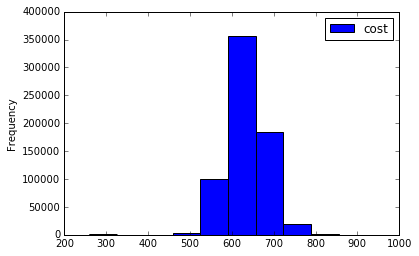

In [24]:
train_data[["cost"]].plot(kind = "hist")

Insurance Cost VS Car Age

In [25]:
print "\n Insurance Cost Set"

print train_data["cost"].unique()

print "\n Car Age Set"

print train_data["car_age"].unique()

print "\n Insurance cost and Car Age compaired against Car Age"

cost_age_df =  train_data[["cost", "car_age"]].groupby("car_age").mean()

print cost_age_df.head()


 Insurance Cost Set
[633 630 638 634 755 730 731 618 616 607 605 602 629 620 627 626 604 585
 603 614 590 584 591 589 597 681 685 705 659 615 622 648 601 600 556 572
 578 575 676 598 689 609 696 692 703 657 654 665 594 610 606 550 551 583
 613 608 612 568 574 577 765 642 652 694 671 651 641 645 643 649 646 702
 563 566 693 701 596 656 559 562 670 625 599 617 623 655 635 621 713 723
 719 721 582 658 586 639 637 650 706 729 735 666 611 580 593 587 592 588
 624 662 704 691 767 699 667 542 631 734 728 725 644 836 653 525 545 549
 632 733 683 738 557 640 687 674 690 684 682 761 530 688 558 661 564 571
 660 686 680 535 536 531 538 647 569 567 573 668 628 754 737 663 708 636
 619 581 695 726 714 707 678 720 718 712 766 760 770 740 727 669 709 757
 672 677 747 743 745 742 673 758 769 768 717 722 555 700 579 716 710 697
 698 675 595 565 570 744 748 576 724 664 679 798 753 553 732 541 533 539
 544 505 506 547 711 554 528 548 560 518 524 546 715 779 756 736 529 784
 792 785 825 521 789 561 540 5

Insurance Cost VS Car Age Plot

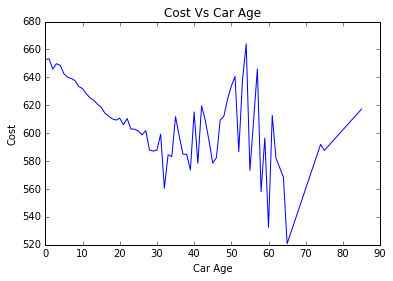

In [26]:
%matplotlib inline

pylab.plot(cost_age_df)

pylab.xlabel("Car Age")

pylab.ylabel("Cost")

pylab.title("Cost Vs Car Age")

Cost correlations

In [27]:
print train_data.corr()["cost"]

customer_ID         -0.002250
shopping_pt          0.043419
record_type         -0.011826
day                  0.010793
location             0.002413
group_size          -0.024009
homeowner           -0.213846
car_age             -0.281002
risk_factor          0.118576
age_oldest          -0.210225
age_youngest        -0.238497
married_couple      -0.075193
C_previous          -0.077188
duration_previous   -0.161597
A                    0.325922
B                    0.118573
C                   -0.033931
D                    0.002963
E                    0.259183
F                    0.141707
G                   -0.011274
cost                 1.000000
Name: cost, dtype: float64


Cost Correlation - Frequency Distribution of all categories

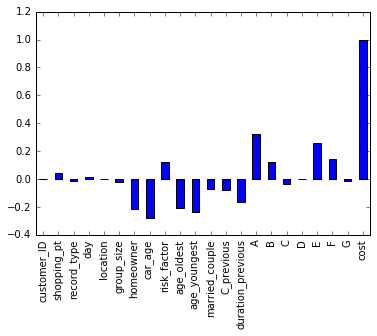

In [28]:
train_data.corr()["cost"].plot.bar()

Cost VS Risk Factor

Insurance Cost vs Risk Factor


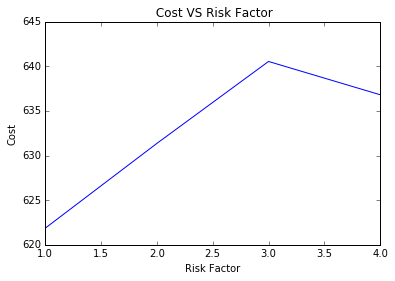

In [29]:
print "Insurance Cost vs Risk Factor" 

pylab.plot(train_data[["cost","risk_factor"]].groupby("risk_factor").mean())

pylab.xlabel("Risk Factor")

pylab.ylabel("Cost")

pylab.title(" Cost VS Risk Factor")

1) Cost goes down as car gets old

2) Cost goes up with higher risk factor

3) Option A and E increase with cost and risk factor , lets find out.

Option A Correlation

In [30]:
print train_data.corr()["A"]

customer_ID         -0.002306
shopping_pt          0.052803
record_type          0.012162
day                 -0.001005
location            -0.003494
group_size           0.017806
homeowner            0.048471
car_age             -0.436740
risk_factor         -0.056620
age_oldest           0.003914
age_youngest         0.005199
married_couple       0.023021
C_previous           0.115207
duration_previous    0.029891
A                    1.000000
B                    0.158040
C                    0.190519
D                    0.189351
E                    0.324618
F                    0.531186
G                    0.045335
cost                 0.325922
Name: A, dtype: float64


Option A Correlation - Frequency Distribution


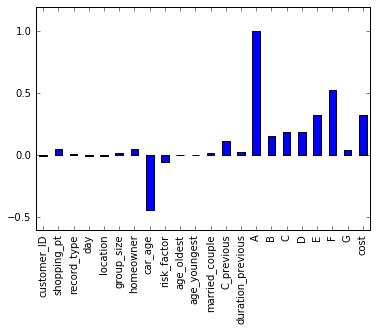

In [31]:
train_data.corr()["A"].plot.bar()

print "Option A Correlation - Frequency Distribution"

Coverage A has a strong negative correlation with car age , and small negative correlatoin with risk factor, its looks like from the data it has a positive relation with home owners and people who stay longer with thier previous instance

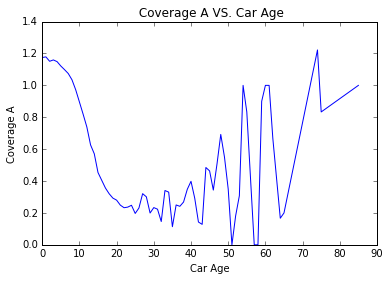

In [32]:
pylab.plot(train_data[["A","car_age"]].groupby("car_age").mean())

pylab.xlabel("Car Age")

pylab.ylabel("Coverage A")

pylab.title(" Coverage A VS. Car Age")

Coverage A is favored for new cars

C Previous VS. Coverage A - deffered for later

In [33]:
#pylab.plot(train_data[["A","C_previous"]].groupby("C_previous"))

In [34]:
#print train_data[["A","C_previous"]].groupby("C_previous")

In [35]:
print train_data["C_previous"].unique()

[ 1.  3.  2.  4.]


Risk Factor VS Car Age

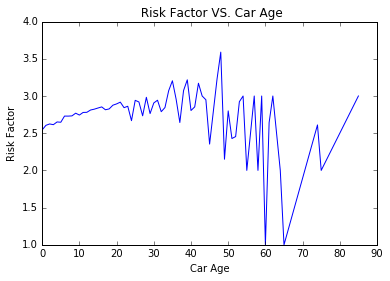

In [36]:
pylab.plot(train_data[["risk_factor","car_age"]].groupby("car_age").mean())

pylab.xlabel("Car Age")

pylab.ylabel("Risk Factor")

pylab.title(" Risk Factor VS. Car Age")

Creating a SQLite DB to split and store files

Developing Correlations between different combinations of Categories VS. buyer history

In [37]:
#conn = sqlite3.connect("AllState_Kaggle.sqlite")

In [38]:
#cur = conn.cursor()

Dropping  and Creating Table Customer_ID

In [39]:
def create_insurance_db():
    
    conn = sqlite3.connect("/home/azafar/Projects/Allstate-Purchase-Prediction-Challenge/Data/AllState_KaggleDB.sqlite")
    
    cur = conn.cursor()
    
    print conn
    
    try:
        cur.executescript('''
        
                    DROP TABLE IF EXISTS Customer_ID;
                    DROP TABLE IF EXISTS Cust_Hist_Data;
                    
                    CREATE TABLE Customer_ID (
                    cust_id  INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE 
                    );
            
                    CREATE TABLE Cust_Hist_Data (
                    hist_id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE 
                    );
                    
        ''')
        
        print "table created"
        
        cur.execute(""" select name from sqlite_master where type = 'table' """)
        
        tables = cur.fetchall()
        
        print tables
    
    except:
        print "continue"
    
    conn.close()

create_insurance_table_db = create_insurance_db()

table created
[(u'sqlite_sequence',), (u'Customer_ID',), (u'Cust_Hist_Data',)]


Number of Unique Customers in the database

In [40]:
print train_data["customer_ID"].unique().shape[0]

97009


Storing the unique customer_ID in the SQLITE data base

In [41]:
"""
def add_values_table_db(add_in_element):
    conn = sqlite3.connect("/home/azafar/Projects/Allstate Purchase Prediction Challenge/Data/AllState_KaggleDB.sqlite")
    
    cur = conn.cursor()
    
    cur.execute('''INSERT OR IGNORE INTO customer_ID (customer_ID) VALUES (?)''', (add_in_element,))
    
    customer_id = cur.fetchone()[0]
    
    conn.commit()
    
    conn.close()
    
    return customer_id
"""

'\ndef add_values_table_db(add_in_element):\n    conn = sqlite3.connect("/home/azafar/Projects/Allstate Purchase Prediction Challenge/Data/AllState_KaggleDB.sqlite")\n    \n    cur = conn.cursor()\n    \n    cur.execute(\'\'\'INSERT OR IGNORE INTO customer_ID (customer_ID) VALUES (?)\'\'\', (add_in_element,))\n    \n    customer_id = cur.fetchone()[0]\n    \n    conn.commit()\n    \n    conn.close()\n    \n    return customer_id\n'

Storing customer IDs now

In [42]:
# testing ---

count = 0

for cust_id1 in (train_data["customer_ID"].unique().tolist()):
    print cust_id1
    count +=1
    if count ==5:
        break

10000000
10000005
10000007
10000013
10000014


In [43]:
# testing array to list and going back up one cell on the workbook

test = train_data["customer_ID"].unique().tolist()

print "done - testing array to list and going back up one cell on Juypter Notebook"

done - testing array to list and going back up one cell on Juypter Notebook


Saving the Customer IDs now after testing the iteration.

In [44]:
"""

for cust_id in (train_data["customer_ID"].unique().tolist()):
    
    if (type(cust_id) is None): continue
    
    add_values_table_db(cust_id)
print "done"

"""

'\n\nfor cust_id in (train_data["customer_ID"].unique().tolist()):\n    \n    if (type(cust_id) is None): continue\n    \n    add_values_table_db(cust_id)\nprint "done"\n\n'

In [45]:
#print customer_id

In [46]:
#len(cust_id)
#print "test"

Purged this sqlite data base inserting algorithm. Please scroll down. This is a O^n algorithm and is running really slow. O^n where min_n = 97,000

In [47]:
print " This was a O^n algorithm, which I purged for an O^1 data dump algorithm \n " \
      "The minimum Asymptotic Time Complixity was O^n , where n_min = 97K "

"""
def add_values_table_db():
    conn = sqlite3.connect("/home/azafar/Projects/Allstate Purchase Prediction Challenge/Data/AllState_KaggleDB.sqlite")
    
    cur = conn.cursor()
    
    try:
    
        for cust_id in (train_data["customer_ID"].unique().tolist()):
        
            if (cust_id is None): continue
            
            cur.execute('INSERT OR IGNORE INTO Customer_ID (customer_ID) VALUES (?)', (cust_id,))
            
            conn.commit()
    
    except Exception, e:
        print"Somthing went wrong"
        
        print e
    
    finally:
        conn.close()

print "done"
"""

 This was a O^n algorithm, which I purged for an O^1 data dump algorithm 
 The minimum Asymptotic Time Complixity was O^n , where n_min = 97K 


'\ndef add_values_table_db():\n    conn = sqlite3.connect("/home/azafar/Projects/Allstate Purchase Prediction Challenge/Data/AllState_KaggleDB.sqlite")\n    \n    cur = conn.cursor()\n    \n    try:\n    \n        for cust_id in (train_data["customer_ID"].unique().tolist()):\n        \n            if (cust_id is None): continue\n            \n            cur.execute(\'INSERT OR IGNORE INTO Customer_ID (customer_ID) VALUES (?)\', (cust_id,))\n            \n            conn.commit()\n    \n    except Exception, e:\n        print"Somthing went wrong"\n        \n        print e\n    \n    finally:\n        conn.close()\n\nprint "done"\n'

In [48]:
"""
print "start"

add_customer_ids = add_values_table_db()

print "done"
"""

'\nprint "start"\n\nadd_customer_ids = add_values_table_db()\n\nprint "done"\n'

In [49]:
"""

print type(run)

print run

run == None

"""

'\n\nprint type(run)\n\nprint run\n\nrun == None\n\n'

Testing and preparing to insert customer ids into sqlite

Checking the first 10 elements of customer id from the df by converting it to a list. syntax works

In [50]:
print (train_data["customer_ID"].unique().tolist())[:10]

[10000000, 10000005, 10000007, 10000013, 10000014, 10000016, 10000019, 10000023, 10000025, 10000026]


Please Scroll down, here I was testing if the data was inserted in the sqlite db

In [51]:
"""
conn = sqlite3.connect("/home/azafar/Projects/Allstate Purchase Prediction Challenge/Data/AllState_KaggleDB.sqlite")
    
cur = conn.cursor()

cur.execute(' SELECT customer_ID FROM Customer_ID LIMIT 10')

run = cur.fetchall()

conn.commit()

conn.close()

print run

"""

'\nconn = sqlite3.connect("/home/azafar/Projects/Allstate Purchase Prediction Challenge/Data/AllState_KaggleDB.sqlite")\n    \ncur = conn.cursor()\n\ncur.execute(\' SELECT customer_ID FROM Customer_ID LIMIT 10\')\n\nrun = cur.fetchall()\n\nconn.commit()\n\nconn.close()\n\nprint run\n\n'

Keeping scrolling Down -  more testing here.

In [52]:
"""
conn = sqlite3.connect("/home/azafar/Projects/Allstate Purchase Prediction Challenge/Data/AllState_KaggleDB.sqlite")

train_data["customer_ID"].unique().to_sql(con = conn, name = 'Customer_ID', 
                                 if_exists='replace',flavor='sqlite')

print "done"
"""

'\nconn = sqlite3.connect("/home/azafar/Projects/Allstate Purchase Prediction Challenge/Data/AllState_KaggleDB.sqlite")\n\ntrain_data["customer_ID"].unique().to_sql(con = conn, name = \'Customer_ID\', \n                                 if_exists=\'replace\',flavor=\'sqlite\')\n\nprint "done"\n'

Creating the Customer_ID Data frame for dumping into the SQLITE DB.

In [53]:
customer_id_df = pd.DataFrame(train_data["customer_ID"].unique().tolist(), columns=["customer_ID"],dtype='int')

print "done"

done


In [54]:
print type(customer_id_df.ix[0,0])

print customer_id_df.head()

<type 'numpy.int64'>
   customer_ID
0     10000000
1     10000005
2     10000007
3     10000013
4     10000014


The SQLITE - DB Creation of DF Tables- Dumping customer_ID into the table Customer_ID. This is a O^1 algorithm. 

In [55]:
conn = sqlite3.connect("/home/azafar/Projects/Allstate-Purchase-Prediction-Challenge/Data/AllState_KaggleDB.sqlite")

customer_id_df.to_sql(con = conn, name = 'Customer_ID', 
                                 if_exists='replace',flavor='sqlite')

print "dumped data into Customer_ID table - tuple : customer_ID"

dumped data into Customer_ID table - tuple : customer_ID


Testing the newly created column customer_ID in sqlite db AllState_Kaggle.sql

In [56]:
conn = sqlite3.connect("/home/azafar/Projects/Allstate-Purchase-Prediction-Challenge/Data/AllState_KaggleDB.sqlite")
    
cur = conn.cursor()

cur.execute(' SELECT * FROM Customer_ID LIMIT 10')

run = cur.fetchall()

conn.commit()

conn.close()

print run

[(0, 10000000), (1, 10000005), (2, 10000007), (3, 10000013), (4, 10000014), (5, 10000016), (6, 10000019), (7, 10000023), (8, 10000025), (9, 10000026)]


It worked! - Saving/commiting here. Asymptotic Time Complixity - O^1

Now Storing the Historical Data of the Customers, insurance offers, and the insurance package they picked.

checking the column names to store

In [57]:
all_hist_cust_column_list = list(train_data.columns.values)[:-8]

print all_hist_cust_column_list

['customer_ID', 'shopping_pt', 'record_type', 'day', 'time', 'state', 'location', 'group_size', 'homeowner', 'car_age', 'car_value', 'risk_factor', 'age_oldest', 'age_youngest', 'married_couple', 'C_previous', 'duration_previous']


Creating columns for customer historical data, NOT thier purchase history or the quotes that were proposed to them

In [58]:
hist_cust_column_list = ['customer_ID','state', 
                         
                         'location','group_size', 
                         
                         'homeowner', 'car_age',
                         
                         'car_value', 'risk_factor', 
                         
                         'age_oldest', 'age_youngest', 
                         
                         'married_couple', 'C_previous', 
                         
                         'duration_previous'
                         ]

print hist_cust_column_list

print "\n These are the common tuples related only to the customer historical data"

['customer_ID', 'state', 'location', 'group_size', 'homeowner', 'car_age', 'car_value', 'risk_factor', 'age_oldest', 'age_youngest', 'married_couple', 'C_previous', 'duration_previous']

 These are the common tuples related only to the customer historical data


Storing the historicl data into the SQLITE db

In [59]:
cust_hist_data_df_test = train_data[hist_cust_column_list]

print cust_hist_data_df_test.head()

   customer_ID state  location  group_size  homeowner  car_age car_value  \
0     10000000    IN     10001           2          0        2         g   
1     10000000    IN     10001           2          0        2         g   
2     10000000    IN     10001           2          0        2         g   
3     10000000    IN     10001           2          0        2         g   
4     10000000    IN     10001           2          0        2         g   

   risk_factor  age_oldest  age_youngest  married_couple  C_previous  \
0          3.0          46            42               1         1.0   
1          3.0          46            42               1         1.0   
2          3.0          46            42               1         1.0   
3          3.0          46            42               1         1.0   
4          3.0          46            42               1         1.0   

   duration_previous  
0                2.0  
1                2.0  
2                2.0  
3                2

Cleaning the Data Frame to contain only one record per customer

In [60]:
for columns_test in hist_cust_column_list:
    print train_data[columns_test].unique().tolist()[:10]
    
print "\n The iteration is working as imagined, now storing a set of the customers common historical data"

[10000000, 10000005, 10000007, 10000013, 10000014, 10000016, 10000019, 10000023, 10000025, 10000026]
['IN', 'NY', 'PA', 'WV', 'MO', 'OH', 'OK', 'FL', 'OR', 'WA']
[10001, 10006, 10008, 10014, 10015, 10017, 10018, 10021, 10025, 10027]
[2, 1, 3, 4]
[0, 1]
[2, 10, 11, 3, 5, 6, 7, 15, 17, 1]
['g', 'e', 'c', 'd', 'f', 'h', 'i', 'b', 'a']
[3.0, 4.0, 2.0, 1.0]
[46, 28, 43, 62, 32, 24, 21, 31, 63, 52]
[42, 28, 43, 60, 24, 21, 31, 63, 17, 57]
[1, 0]
[1.0, 3.0, 2.0, 4.0]
[2.0, 13.0, 4.0, 3.0, 9.0, 0.0, 1.0, 8.0, 14.0, 6.0037739467749764]

 The iteration is working as imagined, now storing a set of the customers common historical data


Testing the comparision function of customer id column in the df against each customer id number

In [63]:
print "\n head of the customer id against the customer id number"

print train_data["customer_ID"].head() == train_data[hist_cust_column_list[0]].tolist()[0]

print "\n tail of customer id against customer id number"

print train_data["customer_ID"].tail() == train_data[hist_cust_column_list[0]].tolist()[0]

print "\n customer id number table out of the pd df"

print train_data[hist_cust_column_list[0]].tolist()[0]


 head of the customer id against the customer id number
0    True
1    True
2    True
3    True
4    True
Name: customer_ID, dtype: bool

 tail of customer id against customer id number
665244    False
665245    False
665246    False
665247    False
665248    False
Name: customer_ID, dtype: bool

 customer id number table out of the pd df
10000000


In [ ]:
Creating a cleaner DF of customer historical data - this df only contain one tuple of values for each customer

In [ ]:
Creating a cleaner DF of customer historical data - this df only contain one tuple of values for each customer

In [64]:
"""
cust_hist_data_df = pd.DataFrame(index= [len(hist_cust_column_list[0])])

for custs in hist_cust_column_list[0][:10]:
    train_data.ix[:,:][train_data["customer_ID"] == train_data[custs].tolist()[0]
print "done"

"""

'\ncust_hist_data_df = pd.DataFrame(index= [len(hist_cust_column_list[0])])\n\nfor custs in hist_cust_column_list[0][:10]:\n    train_data.ix[:,:][train_data["customer_ID"] == train_data[custs].tolist()[0]\nprint "done"\n\n'

Testing the comparision function of customer id column in the df against each customer id number

Creating a DF a set of customer data

In [74]:
cust_hist_data_df = pd.DataFrame(data= train_data[hist_cust_column_list[0]].unique().tolist(), columns= [hist_cust_column_list[0]])

print cust_hist_data_df.head()

for columns in hist_cust_column_list[1:]:
    cust_hist_data_df[columns] = pd.Series(train_data[columns][train_data['customer_ID'].unique()], index= cust_hist_data_df.index)
    
print "done"

   customer_ID
0     10000000
1     10000005
2     10000007
3     10000013
4     10000014


ValueError: Wrong number of items passed 36, placement implies 97009

Dumping the Customer historical data into the Cust_Hist_Data db

In [74]:
conn = sqlite3.connect("/home/azafar/Projects/Allstate-Purchase-Prediction-Challenge/Data/AllState_KaggleDB.sqlite")

cust_hist_data_df.to_sql(con = conn, name = 'Cust_Hist_Data', 
                                 if_exists='replace',flavor='sqlite')

print "dumped data into Cust_Hist_Data (Customer Historical Data) table - tuple : check hist_cust_column_list for the column names"

dumped data into Cust_Hist_Data (Customer Historical Data) table - tuple : check hist_cust_column_list for the column names


Exploring the newly created db of customer historical data. Making sense and building cofounding reasons.

1) shopping_pt -  Shopping points - Is the Insurannce quote number- starting from 1. The shopping_pt quote increments as All State representative proposes a new quote.
2) This is linked to the day in the pursuing the lead (customer)- day
3) day - The day starts at 0, when a new quote is proposed to the customer. And it increments and stored when a new quote is proposed to the customer. 
	Example: On day 0, Bob the Customer was given Quote number 1 (shopping_pt = 1. This will be day 1 (day = 1). 
4) record_type - There are only two types of record for the quotes. 
	i) The record 0, for a quote
	ii) the record 1, for the insurnace plan bought.
Therefore, this is a binary category for stating lead proposal (0) and purchased proposal (1)
  